In [1]:
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from face_recognition import *
from sklearn.cluster import *

from UBFaceDetector import *

In [2]:
face_images = 'validation_folder/images/'
face_cluster = 'faceCluster_5'

In [3]:
def read_imgs(path, typ=1):
    imgs = []
    for folder, _, files in os.walk(path):
        for file in files:
            if '.jpg' in file:
                imgs.append(cv2.imread(f'{folder}/{file}', typ))
    return np.array(imgs, dtype=object)

def dnn_faces(img, typ=None):
    h, w = img.shape[:2]
    model_path = './yunet.onnx'
    boxes = []
    faces = []

    if typ == 'yunet_quantized':
        model_path = './yunet_quantized.onnx'

    detector = cv2.FaceDetectorYN.create(
        model_path,
        "",
        (300, 300),
    )
    detector.setInputSize((w, h))
    _, imgs = detector.detect(img)
    if imgs is not None:
        imgs = imgs.astype(np.int32).tolist()
        for face in imgs:
            x1, y1, w, h = face[:4]
            x1, y1 = max(x1, 0), max(y1, 0)
            faces.append(img[y1:y1 + h + 1, x1:x1 + w + 1])
            boxes.append([x1, y1, w, h])

    return faces, boxes

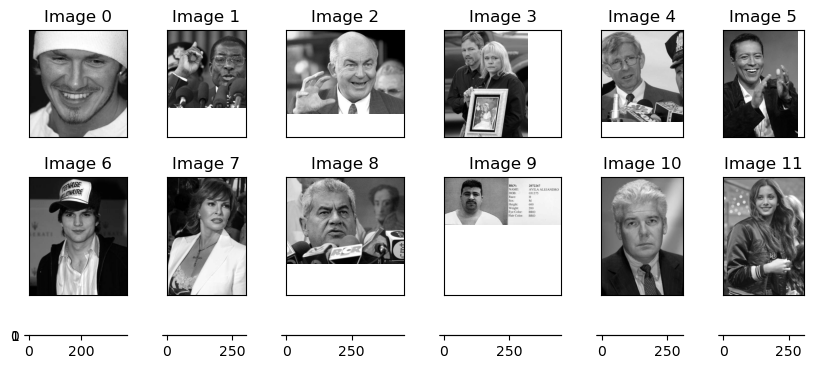

In [4]:
all_faces = read_imgs(face_images, 0)
n = 12
rand_idx = np.random.randint(0, len(all_faces), n)
imgs = all_faces[rand_idx]
show_batch(imgs, col=6, show_title=True)

In [5]:
# k = 4
# faces, boxes = get_faces(imgs[k])
# show_batch(faces, 5)

In [6]:
# show(draw_boxes(imgs[k], boxes))

In [7]:
k = 6
imgs_c = read_imgs(face_images)
faces, boxes = dnn_faces(imgs_c[k])

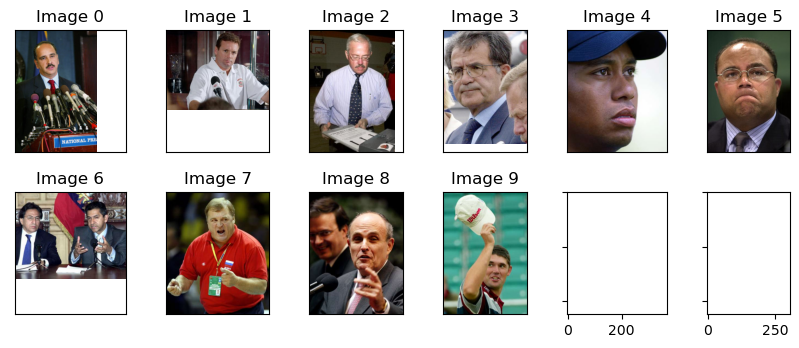

In [8]:
show_batch(imgs_c[:10], col=6, show_title=True)

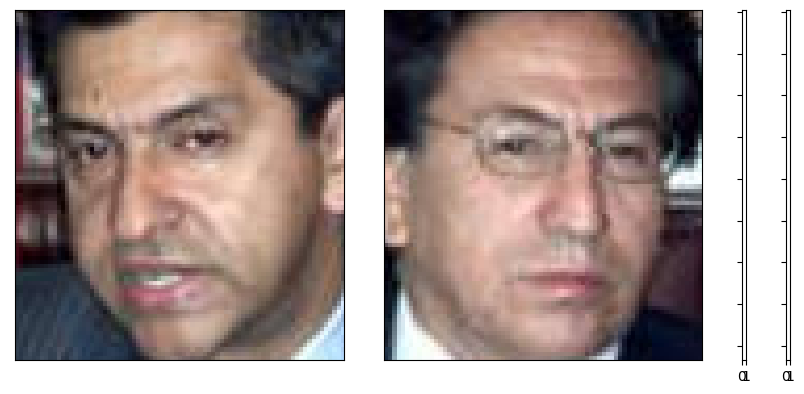

In [9]:
show_batch(faces)

### Clustering

In [10]:
model, res, clusters = cluster_helper(face_cluster, 5, face_detector='dnn', cluster_method='kmeans', p=0.0)

(37,)
Using KMeans


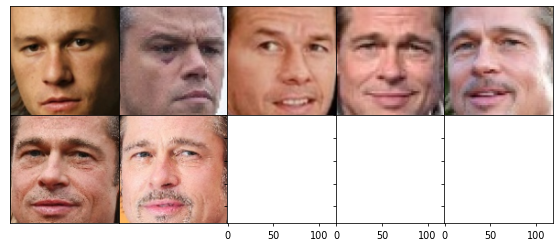

In [11]:
show_batch(clusters[0], axes_pad=0, col=5, show_title=False, dpi=70)

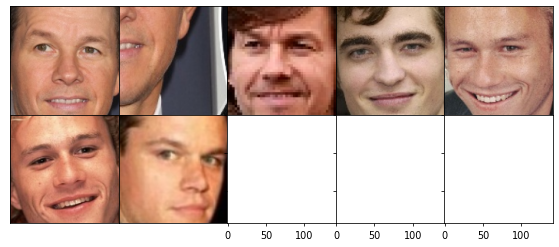

In [12]:
show_batch(clusters[1], axes_pad=0, col=5, show_title=False, dpi=70)

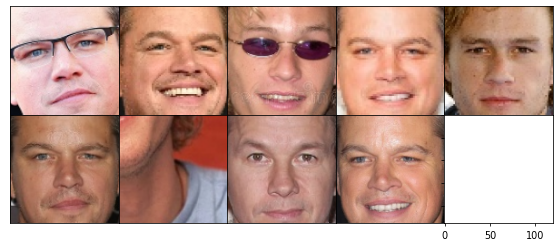

In [13]:
show_batch(clusters[2], axes_pad=0, col=5, show_title=False, dpi=70)

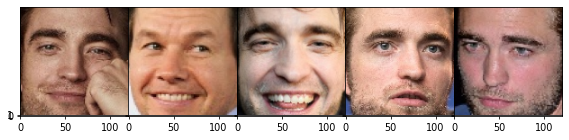

In [14]:
show_batch(clusters[3], axes_pad=0, col=5, show_title=False, dpi=70)

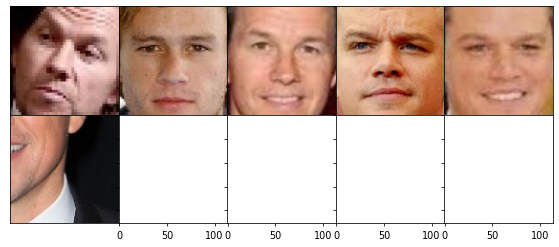

In [15]:
show_batch(clusters[4], axes_pad=0, col=5, show_title=False, dpi=70)

In [16]:
show_batch(clusters[5], axes_pad=0, col=5, show_title=False, dpi=70)

KeyError: 5

In [17]:
[{"cluster_no": 0, "elements": ["img8.jpg", "img4.jpg", "img5.jpg", "img7.jpg", "img6.jpg", "img2.jpg", "img3.jpg", "img1.jpg"]}, {"cluster_no": 1, "elements": ["img14.jpg", "img15.jpg", "img17.jpg", "img16.jpg", "img21.jpg", "img20.jpg", "img18.jpg", "img19.jpg"]}, {"cluster_no": 2, "elements": ["img28.jpg", "img29.jpg", "img22.jpg", "img23.jpg", "img27.jpg", "img26.jpg", "img24.jpg", "img30.jpg", "img25.jpg"]}, {"cluster_no": 3, "elements": ["img9.jpg", "img12.jpg", "img13.jpg", "img11.jpg", "img10.jpg"]}, {"cluster_no": 4, "elements": ["img35.jpg", "img34.jpg", "img36.jpg", "img33.jpg", "img32.jpg", "img31.jpg"]}]

[{'cluster_no': 0,
  'elements': ['img8.jpg',
   'img4.jpg',
   'img5.jpg',
   'img7.jpg',
   'img6.jpg',
   'img2.jpg',
   'img3.jpg',
   'img1.jpg']},
 {'cluster_no': 1,
  'elements': ['img14.jpg',
   'img15.jpg',
   'img17.jpg',
   'img16.jpg',
   'img21.jpg',
   'img20.jpg',
   'img18.jpg',
   'img19.jpg']},
 {'cluster_no': 2,
  'elements': ['img28.jpg',
   'img29.jpg',
   'img22.jpg',
   'img23.jpg',
   'img27.jpg',
   'img26.jpg',
   'img24.jpg',
   'img30.jpg',
   'img25.jpg']},
 {'cluster_no': 3,
  'elements': ['img9.jpg',
   'img12.jpg',
   'img13.jpg',
   'img11.jpg',
   'img10.jpg']},
 {'cluster_no': 4,
  'elements': ['img35.jpg',
   'img34.jpg',
   'img36.jpg',
   'img33.jpg',
   'img32.jpg',
   'img31.jpg']}]

In [18]:
[{"cluster_no": 0, "elements": ["img14.jpg", "img19.jpg", "img16.jpg", "img20.jpg", "img15.jpg", "img17.jpg", "img21.jpg", "img18.jpg"]}, {"cluster_no": 1, "elements": ["img10.jpg", "img13.jpg", "img9.jpg", "img11.jpg", "img12.jpg"]}, {"cluster_no": 2, "elements": ["img22.jpg", "img23.jpg", "img27.jpg", "img29.jpg", "img25.jpg", "img28.jpg", "img26.jpg", "img24.jpg", "img30.jpg"]}, {"cluster_no": 3, "elements": ["img8.jpg", "img3.jpg", "img6.jpg", "img5.jpg", "img2.jpg", "img1.jpg", "img7.jpg", "img4.jpg"]}, {"cluster_no": 4, "elements": ["img33.jpg", "img35.jpg", "img34.jpg", "img32.jpg", "img31.jpg", "img36.jpg"]}]

[{'cluster_no': 0,
  'elements': ['img14.jpg',
   'img19.jpg',
   'img16.jpg',
   'img20.jpg',
   'img15.jpg',
   'img17.jpg',
   'img21.jpg',
   'img18.jpg']},
 {'cluster_no': 1,
  'elements': ['img10.jpg',
   'img13.jpg',
   'img9.jpg',
   'img11.jpg',
   'img12.jpg']},
 {'cluster_no': 2,
  'elements': ['img22.jpg',
   'img23.jpg',
   'img27.jpg',
   'img29.jpg',
   'img25.jpg',
   'img28.jpg',
   'img26.jpg',
   'img24.jpg',
   'img30.jpg']},
 {'cluster_no': 3,
  'elements': ['img8.jpg',
   'img3.jpg',
   'img6.jpg',
   'img5.jpg',
   'img2.jpg',
   'img1.jpg',
   'img7.jpg',
   'img4.jpg']},
 {'cluster_no': 4,
  'elements': ['img33.jpg',
   'img35.jpg',
   'img34.jpg',
   'img32.jpg',
   'img31.jpg',
   'img36.jpg']}]